<h1>ML Variance Model that predicts daily volatility of stock using linear regression</h1>

gathering data from yfinance


In [17]:
import yfinance as yf
import numpy as np
import matplotlib as plt

ticker = yf.Ticker('SPY')
data = yf.download('SPY', start='2010-01-01', end='2024-10-01') #input desired stock ticker here
volume = ticker.info["averageVolume10days"]

data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2010-01-04,86.315979,113.330002,113.389999,111.510002,112.370003,118944600
2010-01-05,86.544479,113.629997,113.680000,112.849998,113.260002,111579900
2010-01-06,86.605408,113.709999,113.989998,113.430000,113.519997,116074400
2010-01-07,86.970985,114.190002,114.330002,113.180000,113.500000,131091100
2010-01-08,87.260437,114.570000,114.620003,113.660004,113.889999,126402800


</h2>calculate daily returns and volatility</h2>

In [18]:
# Calculate daily returns (returns list of percentage change for each day compared to previous)
data['Return'] = data['Adj Close'].pct_change()

# Calculate rolling variance (volatility) over a 20-day window
data['Volatility'] = data['Return'].rolling(window=20).var()

# Drop rows with NaN values resulting from calculations
data.dropna(inplace=True)

# Display the updated data
data[['Return', 'Volatility']].head()

Price,Return,Volatility
Ticker,,
Date,,
2010-02-02,0.012103,0.000112
2010-02-03,-0.004982,0.000112
2010-02-04,-0.030866,0.000154
2010-02-05,0.002067,0.000152
2010-02-08,-0.007219,0.000151


use previous day's volatility and moving average as features

In [19]:
# Feature 1: Previous day's volatility
data['Volatility_Lag1'] = data['Volatility'].shift(1)

# Feature 2: 20-day moving average of returns
data['MA_Return'] = data['Return'].rolling(window=20).mean()

# Drop any new NaN values (i.e. empty values)
data.dropna(inplace=True)

# Define feature matrix X and target vector y
X = data[['Volatility_Lag1', 'MA_Return']]
y = data['Volatility']

split data (use 80 20 ratio for training and testing)

In [20]:
from sklearn.model_selection import train_test_split

# Since it's time series, we'll split based on index
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


train using linear regression for simplicity

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

predict

In [22]:
# Predict volatility on the test set
y_pred = model.predict(X_test)

evaluate model

In [23]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
#rmse = root_mean_squared_log_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.6f}")
#print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")

Mean Absolute Error (MAE): 0.000014


visualizing the data

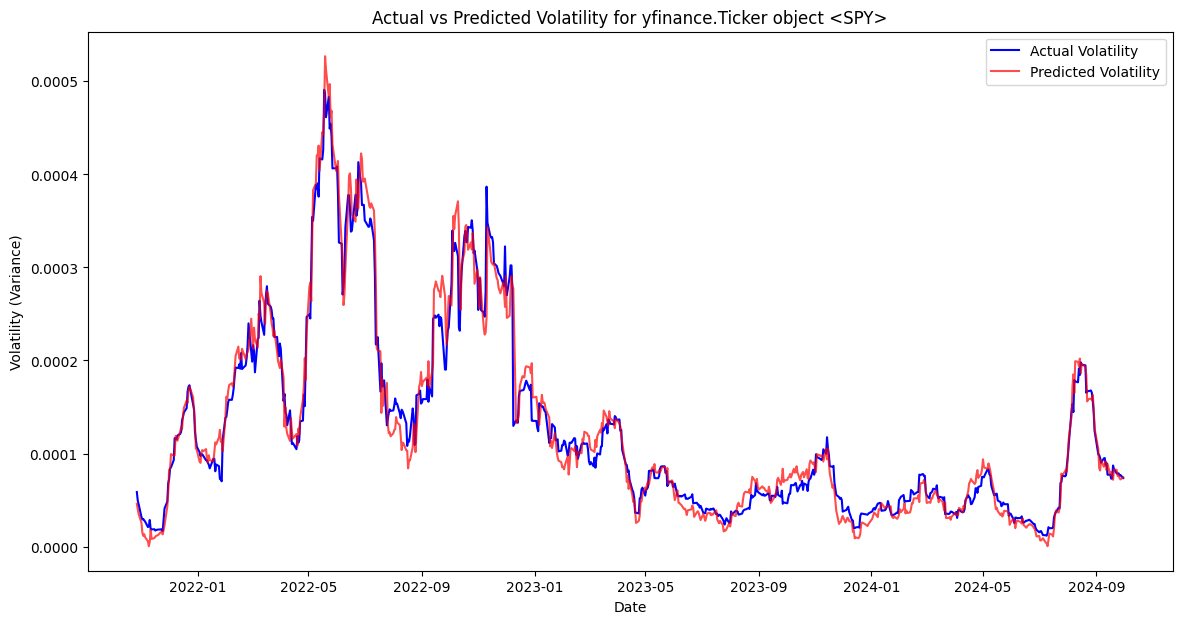

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(14,7))

# Plot actual volatility
plt.plot(y_test.index, y_test, label='Actual Volatility', color='blue')

# Plot predicted volatility
plt.plot(y_test.index, y_pred, label='Predicted Volatility', color='red', alpha=0.7)

# Add title and labels
plt.title(f'Actual vs Predicted Volatility for {ticker}')
plt.xlabel('Date')
plt.ylabel('Volatility (Variance)')

# Show legend
plt.legend()

# Display the plot
plt.show()